## CUSTOMER SEGMENTATION ANALYSIS

In [7]:
import pandas as pd

# Load dataset from CSV file (adjust file path as needed)
data = pd.read_csv('ifood_df.csv')

# Check the first few rows of the data
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


## Data Exploration and Cleaning

In [13]:
# Check for missing values and basic statistics
print(data.isnull().sum())
print(data.describe())

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

## Descriptive Statistics

In [17]:
# Average purchase value
avg_purchase_value = data['MntTotal'].mean()
print("Average Purchase Value:", avg_purchase_value)

# Frequency of purchases (using number of store purchases as an example)
purchase_frequency = data['NumStorePurchases'].mean()
print("Average Frequency of Purchases:", purchase_frequency)

Average Purchase Value: 562.7646258503402
Average Frequency of Purchases: 5.823582766439909


## Customer Segmentation using K-Means Clustering

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
X = data[['MntTotal', 'NumStorePurchases']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3)  # Adjust number of clusters if needed
data['cluster'] = kmeans.fit_predict(X_scaled)

# View cluster centroids
print(kmeans.cluster_centers_)


[[ 1.51659639  0.26767667]
 [-0.72915993 -0.68981213]
 [ 0.56245997  1.35826613]]


## Visualization

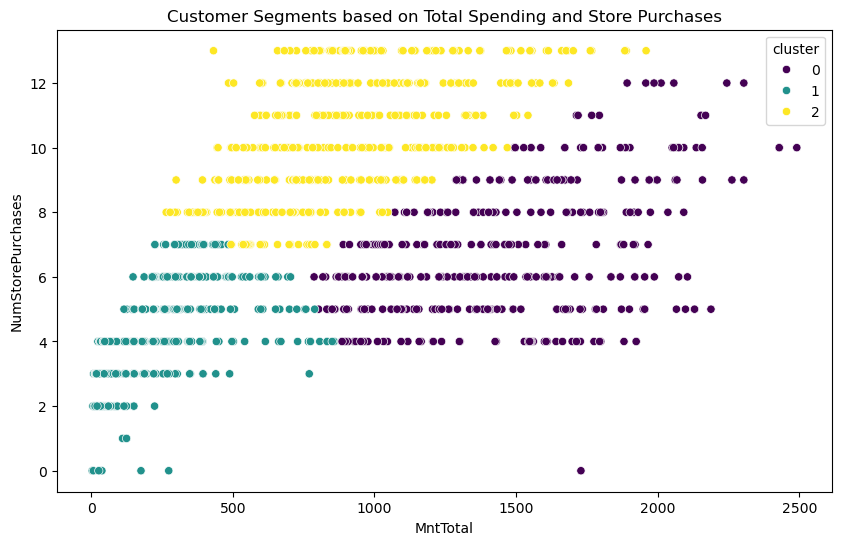

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MntTotal', y='NumStorePurchases', hue='cluster', data=data, palette='viridis')
plt.title('Customer Segments based on Total Spending and Store Purchases')
plt.show()

## Insights and Recommendations

In [23]:
# Group by clusters and calculate mean values for each cluster
cluster_insights = data.groupby('cluster').mean()
print(cluster_insights)

# Use insights to provide recommendations based on behavior.

               Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
cluster                                                                       
0        75034.035443  0.045570  0.291139  49.501266  733.417722  65.384810   
1        37857.253994  0.701278  0.519968  49.220447   81.286741   7.188498   
2        65933.679211  0.141577  0.629032  48.186380  508.283154  41.921147   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
cluster                                                                     
0             477.610127        93.997468         65.620253     76.794937   
1              36.034345        10.952875          7.447284     24.176518   
2             234.304659        58.084229         44.039427     65.489247   

         ...  marital_Together  marital_Widow  education_2n Cycle  \
cluster  ...                                                        
0        ...          0.248101       0.048101            0.063291   
1        ..